In [76]:
import pandas as pd

In [77]:
books = pd.read_parquet("../data/raw/books_metadata.parquet")
books

,id,name,one_star,four_stars,total_num_ratings,publish_month,publish_day,publisher,counts_of_review,publish_year,rating,two_stars,five_stars,three_stars,count_of_text_reviews,pages,author_1,author_2,total_authors
0,600000,"Lessons Learned (Great Chefs, #2)",63.0,1016.0,3374,15,2,Silhouette,86,1993,3.74,87.0,947.0,1061.0,NaN,250.0,Nora Roberts,None,1
1,600037,Spine-Chillers: Unforgettable Tales of Terror,NaN,0.0,5,1,1,Doubleday Books,2,1978,2.80,1.0,1.0,2.0,NaN,397.0,Roger Elwood,None,1
2,600038,An Almost Perfect Moment,NaN,82.0,331,3,2,Ecco,10,2004,3.34,57.0,NaN,126.0,NaN,336.0,Binnie Kirshenbaum,None,1
3,600043,The Air War: 1939-45,0.0,19.0,57,1,9,Potomac Books,7,2005,3.86,4.0,17.0,17.0,NaN,290.0,Richard Overy,None,1
4,600057,Justice at Nuremberg,NaN,90.0,225,28,1,Basic Books,16,1993,4.15,6.0,88.0,40.0,NaN,624.0,Robert E. Conot,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99587,4845757,From the Black Churches: A Historiographic Tax...,0.0,0.0,0,5,1,A & B Publishers Group,0,2000,0.00,0.0,0.0,0.0,NaN,128.0,E.S.P. McPherson,None,1
99588,4845771,Compulsory Schooling Disease: How Children Abs...,0.0,1.0,3,4,1,Drake International Services,1,2007,4.67,0.0,2.0,0.0,NaN,63.0,Chris Shute,None,1
99589,4845944,The New American Bible [Student Text Edition],7.0,312.0,2453,9,1,None,1,1987,4.52,71.0,1813.0,186.0,NaN,1536.0,Anonymous,None,1
99590,4846078,The Pastoral Challenges of the New Immigration,0.0,0.0,0,12,1,Center for Migration,0,1990,0.00,0.0,0.0,0.0,NaN,14.0,Silvano M. Tomasi,None,1


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
subset = books[(books['publish_year'] < 2025) & (books['publish_year'] > 1950) & (books['rating'] > 0)]
print(subset['rating'].min())
X = subset[['publish_year']].values
y = subset['rating'].values

1.0


In [80]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [81]:
X.max()

2021

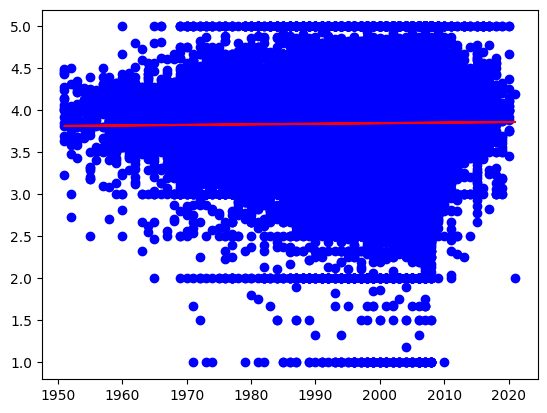

In [82]:
import matplotlib.pyplot as plt
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')

In [84]:
import pandas as pd
df = pd.read_csv("../data/raw/full_books (1).csv")
df.to_parquet("../data/raw/books.parquet")

C:\Users\GROSSMANLJ21\AppData\Local\Temp\ipykernel_17812\3579990343.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/full_books (1).csv")


In [85]:
df.columns

Index(['Id', 'Name', 'One Star', 'Four Stars', 'TotalNumRatings',
       'PublishMonth', 'PublishDay', 'Publisher', 'CountsOfReview',
       'PublishYear', 'Language', 'Authors', 'Rating', 'Two Stars',
       'Five Stars', 'ISBN', 'Three Stars', 'Description',
       'Count of text reviews', 'Pages'],
      dtype='object')

In [87]:
df.columns = ["id", "name", "one_star", "four_stars", 'total_num_ratings', 'publish_month', "publish_day", "publisher", "counts_of_review", "publish_year", "language","authors", "rating", "two_stars", "five_stars", "isbn", "three_stars", "description", "count_of_text_reviews", "pages"]

In [90]:
df = df.drop(columns=['description'])

In [91]:
df.to_parquet("../data/raw/books_metadata.parquet")

In [95]:
from bs4 import BeautifulSoup


def _remove_html_bs(text: str):
    return BeautifulSoup(text, "html.parser").get_text()

descriptions = pd.read_parquet("../data/transformed/books_description.parquet")
descriptions = descriptions[~descriptions['description'].isnull()]
descriptions['description'] = descriptions['description'].apply(lambda row: _remove_html_bs(row))
descriptions.to_parquet("../data/transformed/books_description.parquet")


C:\Users\GROSSMANLJ21\AppData\Local\Temp\ipykernel_17812\1796456046.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [ ]:
df = pd.read_parquet("../data/raw/movies_metadata.parquet")
df.columns